__DAY2__


# __Copy and View__
- Copy :  A new, independent object(Editing Affects Original? No)

- View: A reference to original data(Editing Affects Original? Yes)

In Pandas, some slicing or indexing operations return views, while others return copies.

If you modify a view, you might accidentally change the original Series or DataFrame.

In [2]:
import pandas as pd

s=pd.Series([i**2 for i in range(0,11)])
s

0       0
1       1
2       4
3       9
4      16
5      25
6      36
7      49
8      64
9      81
10    100
dtype: int64

In [3]:
view = s[1:4]   
print(view)
view[1] = 999   # Modifies the view
print("Original s:\n", s)  #  Might reflect change
#This behavior is not guaranteed — depends on Pandas version and context.
# THis behaviour is Highly dangerous if you dont handle it correctly

1    1
2    4
3    9
dtype: int64
Original s:
 0       0
1     999
2       4
3       9
4      16
5      25
6      36
7      49
8      64
9      81
10    100
dtype: int64


In [4]:
s=pd.Series([i**2 for i in range(0,11)])
copy=s[1:4].copy()
print(copy)

copy[1]=999 # No CHange In Original
print("\nOriginal\n",s)

1    1
2    4
3    9
dtype: int64

Original
 0       0
1       1
2       4
3       9
4      16
5      25
6      36
7      49
8      64
9      81
10    100
dtype: int64


In [ ]:
"""Sometimes it does change the original.
Sometimes it doesn't.
Sometimes you get a warning (SettingWithCopyWarning).
Other times — nothing.
 Thats why its unpredictable and dangerous 

Solution::  Always Use .copy() When Editing a Subset

We Have to also SUper Carefull when We use head() and tail() they are view
functions so if we make changes in these data
it will directly changes to original Series So always use .copy()
before Doing Changes in our view
"""

# Python functionality on a Pandas Series

In [6]:
x=pd.read_csv("DATASETS/DAY1/subs.csv")

In [7]:
type(x)
x

,Subscribers gained
0,48
1,57
2,40
3,43
4,44
...,...
360,231
361,226
362,155
363,144


In [8]:
#creating the series from above dataframe
subs=pd.Series(x["Subscribers gained"] )

In [31]:
#(len(), type(), dir(), sorted(), min(), max())
print("length:",len(subs))           # Number of elements
print("Type: ",type(subs))          # Type: pandas.core.series.Series
 # print(dir(subs))           # All attributes/methods
 # print("New Sorted List",sorted(subs))        # Sorts the values (not inplace)
print("Minimum ",min(subs.values))           # Minimum value
print("Maximum ",max(subs))           # Maximum value


length: 365
Type:  <class 'pandas.core.series.Series'>
Minimum  33
Maximum  396


In [32]:
"""# Type Casting : COnverting in different Datatypes
We can do this with pandas Series """
# print(list(subs))
# print(dict(subs))
# print(tuple(subs))



'# Type Casting : COnverting in different Datatypes\nWe can do this with pandas Series '

In [11]:
# MemberShip Operator Works IN Series
# in , not in : By Default these Operators finds Things in Index(labels)
subs

0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64

In [12]:
#searching In index
print(364 in subs)
print(365 in subs)

True
False


In [13]:
# searching In values
print(100 in subs.values)
print(364 not in subs.values)


True
True


In [33]:
# looping in Series :By Default for looops finds things in values section
# FIrst 10 items

x=0
for i in subs:
    if x!=10:
        print(i)
        x+=1
    else:
        break


48
57
40
43
44
46
33
40
44
74


In [ ]:
"""# Note : Arithmetic Operation Are Only Happened On same Index Values otherwise Nan
#If indices dont match, result will have NaN in non-overlapping parts:"""
s1 = pd.Series([10, 20, 30], index=['a', 'b', 'c'])
s2 = pd.Series([1, 2, 3], index=['a', 'b', 'c'])

# Element-wise addition
print("Addition:\n",s1 + s2)

# Subtraction
print("Subtraction:\n", s1 - s2)

# Multiplication
print("Multiplication:\n", s1 * s2)

# Division
print("Division:\n", s1 / s2)


Addition:
 a    11
b    22
c    33
dtype: int64
Subtraction:
 a     9
b    18
c    27
dtype: int64
Multiplication:
 a    10
b    40
c    90
dtype: int64
Division:
 a    10.0
b    10.0
c    10.0
dtype: float64


In [ ]:
"""# Using .add(), .sub()"""
print("s1.add(s3, fill_value=0):\n", s1.add(s2, fill_value=0))


s1.add(s3, fill_value=0):
 a    11
b    22
c    33
dtype: int64


In [ ]:
"""# Mini Practice""" 
s = pd.Series([10, 20, 30, 40])
print("Add 5:", s + 5)
print("Multiply by 3:", s * 3)

s2 = pd.Series([2, 4, 0, 8])
print("Division:", s / s2)



Add 5: 0    15
1    25
2    35
3    45
dtype: int64
Multiply by 3: 0     30
1     60
2     90
3    120
dtype: int64
Division: 0    5.0
1    5.0
2    inf
3    5.0
dtype: float64


# Boolean Indexing Practice

In [ ]:
"""# We have data of kohli match runs kohli_ipl.csv
# import it """
df=pd.read_csv("DATASETS/DAY1/kohli_ipl.csv",index_col="match_no")

# CReating Series
kohli_series=pd.Series(df["runs"].values,index=df.index)
print(kohli_series)
print(type(kohli_series))

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Length: 215, dtype: int64
<class 'pandas.core.series.Series'>


In [ ]:
"""#1 Find Number of 50's and 100's Scored by Kohli"""
mask=kohli_series>=50 

size=kohli_series[mask].size
print("Matches where runs > 50: ",size)

Matches where runs > 50:  50


In [ ]:
"""#2 FInd THe Number of Ducks"""
mask=kohli_series==0

print(kohli_series[mask].size)


9


In [ ]:
"""#3 Get How Many Days get Subscriber >200"""
mask=subs>200
print(subs[mask].size)

59


In [ ]:
"""# From bollywood.csv find which actors have done more than 20 movies"""
movies=pd.read_csv("DATASETS/DAY1/bollywood.csv",index_col="movie")
print(movies)

movies_series=pd.Series(movies["lead"].values,index=movies.index)

                                                  lead
movie                                                 
Uri: The Surgical Strike                 Vicky Kaushal
Battalion 609                              Vicky Ahuja
The Accidental Prime Minister (film)       Anupam Kher
Why Cheat India                          Emraan Hashmi
Evening Shadows                       Mona Ambegaonkar
...                                                ...
Hum Tumhare Hain Sanam                  Shah Rukh Khan
Aankhen (2002 film)                   Amitabh Bachchan
Saathiya (film)                           Vivek Oberoi
Company (film)                              Ajay Devgn
Awara Paagal Deewana                      Akshay Kumar

[1500 rows x 1 columns]


In [23]:
print((movies_series))

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Length: 1500, dtype: object


In [ ]:
"""find the actor Frequency"""
counts=movies_series.value_counts()
print(counts,"\n")
"""# now find the Boolean Mask"""
mask=counts>20
print("\nBoolean Mask\n,",mask)

"""# simple find the Actor Names"""
print("\nNAmes Of actors\n",counts[mask])
# number
print("\nNUMBER OF ACTOR\n",counts[mask].size)

Akshay Kumar            48
Amitabh Bachchan        45
Ajay Devgn              38
Salman Khan             31
Sanjay Dutt             26
                        ..
Tanishaa Mukerji         1
Tanuja                   1
Ankit                    1
Rakhee Gulzar            1
Geetika Vidya Ohlyan     1
Name: count, Length: 566, dtype: int64 


Boolean Mask
, Akshay Kumar             True
Amitabh Bachchan         True
Ajay Devgn               True
Salman Khan              True
Sanjay Dutt              True
                        ...  
Tanishaa Mukerji        False
Tanuja                  False
Ankit                   False
Rakhee Gulzar           False
Geetika Vidya Ohlyan    False
Name: count, Length: 566, dtype: bool

NAmes Of actors
 Akshay Kumar        48
Amitabh Bachchan    45
Ajay Devgn          38
Salman Khan         31
Sanjay Dutt         26
Shah Rukh Khan      22
Emraan Hashmi       21
Name: count, dtype: int64

NUMBER OF ACTOR
 7


# GRAPH PLOT WITH SERIES PANDAS

<Axes: >

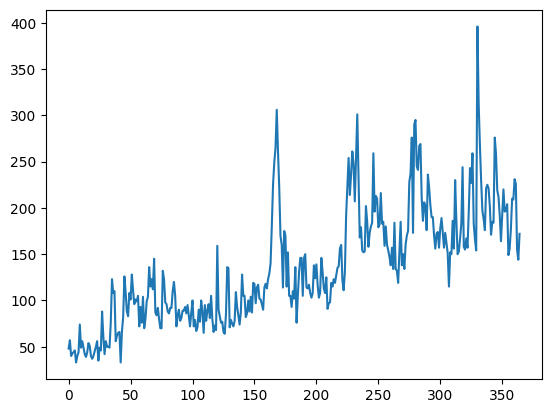

In [25]:
subs.plot()

<Axes: xlabel='match_no'>

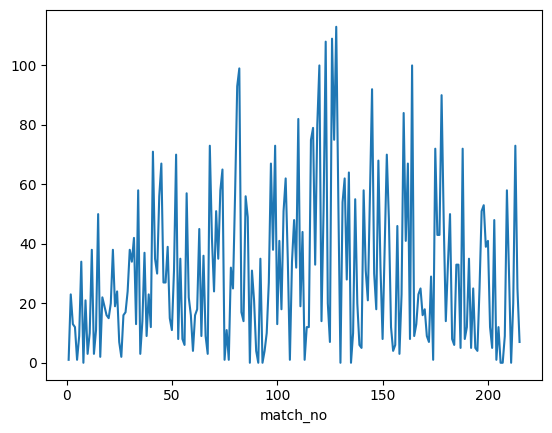

In [26]:
kohli_series.plot()

Akshay Kumar        48
Amitabh Bachchan    45
Ajay Devgn          38
Salman Khan         31
Sanjay Dutt         26
Shah Rukh Khan      22
Emraan Hashmi       21
Saif Ali Khan       18
John Abraham        18
Sunny Deol          17
Name: count, dtype: int64


<Axes: >

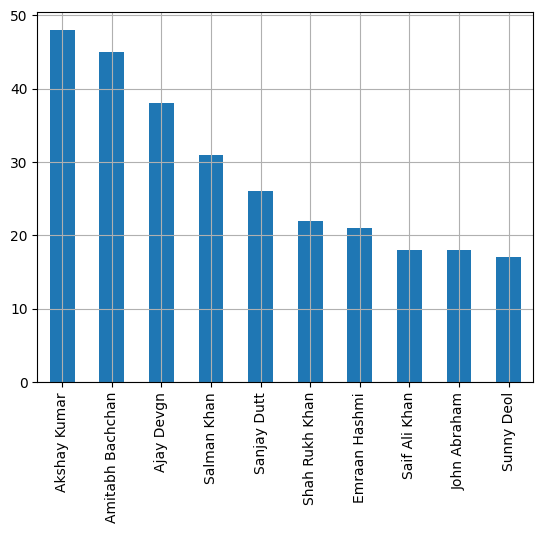

In [27]:
print(movies_series.value_counts().sort_values(ascending=False).head(10))
movies_series.value_counts().sort_values(ascending=False).head(10).plot(grid=True,kind='bar')

<Axes: ylabel='count'>

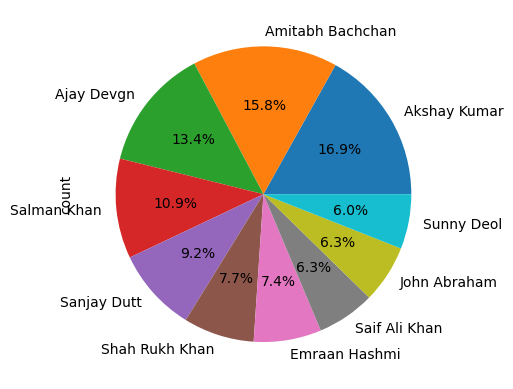

In [28]:
movies_series.value_counts().sort_values(ascending=False).head(10).plot(grid=True, kind='pie', autopct='%1.1f%%')

<Axes: ylabel='count'>

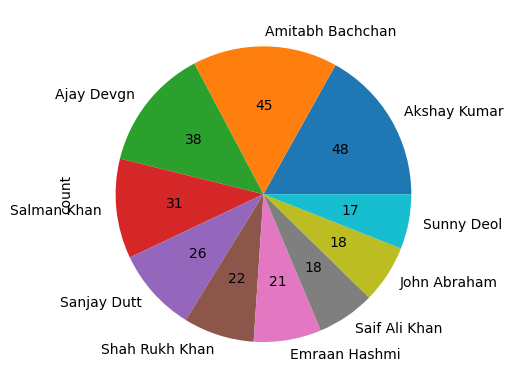

In [29]:
counts.sort_values(ascending=False).head(10).plot(
    
    kind='pie',
    autopct=lambda p: int(round(p * counts.sort_values(ascending=False).head(10).sum() / 100))
)

# Important Series Methods

In [ ]:
"""
1. astype() 
Change Data Type

2. between(): 
Check if values fall in range

3. clip()
Limit values to a range

4.drop_duplicates():
 Remove duplicate values

5.isnull(): 
Check for missing values (NaN)

6.fillna():
 Fill missing values

7.isin():
   Check if values exist in a list

8.apply(): 
Apply a custom function



"""

1. astype()

In [ ]:
kohli_series.head()
"""We can Observe that the kohli_series Values Datatype is int64
if we check its Size in memory using sys module"""

match_no
1     1
2    23
3    13
4    12
5     1
dtype: int64

In [ ]:
import sys ,numpy
print(sys.getsizeof(kohli_series))
"""we can Reduce the Size using the small int precesion 
using astype() Function"""
kohli_series=kohli_series.astype("int16")

sys.getsizeof(kohli_series)

3472


2182

2. s.between(): Returns Boolean Series of inside some range

In [41]:
"""i want to check that in how many innnings the kohli make runs between 51-99
we can do this using between()"""
x=kohli_series.between(51,99)
print(x)
print("Matches in Which the Kohli Score 51-99 : ",kohli_series[x].size)

match_no
1      False
2      False
3      False
4      False
5      False
       ...  
211    False
212    False
213     True
214    False
215    False
Length: 215, dtype: bool
Matches in Which the Kohli Score 51-99 :  43


3. clip(): used to clip the array in min to max values 


In [ ]:
kohli_series.clip(lower=12,upper=50)
""" clip function makes the whole series in between lower to upper"""

match_no
1      12
2      23
3      13
4      12
5      12
       ..
211    12
212    20
213    50
214    25
215    12
Length: 215, dtype: int16

4. drop_duplicates()

In [ ]:
s = pd.Series([1, 2, 2, 3, 3, 3])
""" it removes all the duplicate items from the Series.
we can also control the which occurrence is keeped in series
using 
keep='first'         for first
keep='last'          for last
"""
# ORiginal Index
print("4. Drop duplicates:\n", s.drop_duplicates(keep='last',ignore_index=False))

# New INdex of Series
print("4. Drop duplicates:\n", s.drop_duplicates(keep='last',ignore_index=True))

4. Drop duplicates:
 0    1
2    2
5    3
dtype: int64
4. Drop duplicates:
 0    1
1    2
2    3
dtype: int64


5. .duplicated()

To get the Duplicate value mask in Series ..

In [60]:
"""we can easily get the duplicate values
using duplicated()"""
print(s.duplicated())
print("Number OF TOtal Duplicate Values",s.duplicated().sum())


0    False
1    False
2     True
3    False
4     True
5     True
dtype: bool
Number OF TOtal Duplicate Values 3


In [67]:
s = pd.Series([10, None, 30, None])
print("5. isnull result:\n", s.isnull())


5. isnull result:
 0    False
1     True
2    False
3     True
dtype: bool


In [ ]:
"Size returns the total number of ELements "
s.size

4

In [ ]:
"""Count returns only the Non Null Values"""
s.count()

np.int64(2)

In [71]:
print(s[s.isnull()])
print("Total Number OF Null Values ",s.isnull().sum())

1   NaN
3   NaN
dtype: float64
Total Number OF Null Values  2


6. dropna(): Just drop the Null Values (Missing Values)

return new Series

In [84]:
s.dropna()

0    10.0
2    30.0
dtype: float64

7. fillna(a):Replace the Nan Values With our own Number(a)

return new Series

In [85]:
s.fillna(5)

0    10.0
1     5.0
2    30.0
3     5.0
dtype: float64

8. isin(): checks the Multiple Elements inside the Series

Return the Boolean mask to get the Elements

In [ ]:
"""Getting the Boolean Mask"""
kohli_series.isin([50,100,150,200])

match_no
1      False
2      False
3      False
4      False
5      False
       ...  
211    False
212    False
213    False
214    False
215    False
Length: 215, dtype: bool

In [ ]:
""" Then Using THat mask To get those Elements"""
kohli_series[kohli_series.isin([50,100,150,200])]

match_no
15      50
120    100
164    100
182     50
dtype: int16

9. apply() : To apply the Custom Logic on Our Series :

In [91]:
movies_series

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Length: 1500, dtype: object

__Let Us Suppose I need to Apply the Function on Above Series__
__Like To Take Only The First Name Of The Actor__
__So to Apply The Custom Logic We Use apply() function on our Series__

In [ ]:
movies_series.apply(lambda x : x.split()[0].upper() )
"""We can use the apply() function to apply any logic on our Series"""

movie
Uri: The Surgical Strike                  VICKY
Battalion 609                             VICKY
The Accidental Prime Minister (film)     ANUPAM
Why Cheat India                          EMRAAN
Evening Shadows                            MONA
                                         ...   
Hum Tumhare Hain Sanam                     SHAH
Aankhen (2002 film)                     AMITABH
Saathiya (film)                           VIVEK
Company (film)                             AJAY
Awara Paagal Deewana                     AKSHAY
Length: 1500, dtype: object

__from above Series Split the first name and rest of the name__

__use apply() function__

In [ ]:
# Do this
#  Split into first name and rest of the name
first_names = movies_series.apply(lambda x: x.split()[0])
"""Logic Explain : we know x.split() gives us the list of name words
example x='Amitabh Bachan'
x.split()=['Amitabh', 'Bachchan']

now taking only its first element as firstname
=x.split()[0]
"""

rest_names = movies_series.apply(lambda x: ' '.join(x.split()[1:]) if len(x.split()) > 1 else '')
"""
Logic Explain:
Similarly x.split()=['Amitabh', 'Bachchan']
from x.split()[1:]     :  Takes everything from index 1 onwards (all except the first word):
then join it using ' '.join(x.split()[1:])
only do this work if len(x.split())>1 otherwise take ''
this is explanation of function

"""
# Create a DataFrame with both columns
actor_names_df = pd.DataFrame({
    'first_name': first_names,
    'rest_name': rest_names
}, index=movies_series.index)

print(actor_names_df)

                                     first_name    rest_name
movie                                                       
Uri: The Surgical Strike                  Vicky      Kaushal
Battalion 609                             Vicky        Ahuja
The Accidental Prime Minister (film)     Anupam         Kher
Why Cheat India                          Emraan       Hashmi
Evening Shadows                            Mona  Ambegaonkar
...                                         ...          ...
Hum Tumhare Hain Sanam                     Shah    Rukh Khan
Aankhen (2002 film)                     Amitabh     Bachchan
Saathiya (film)                           Vivek       Oberoi
Company (film)                             Ajay        Devgn
Awara Paagal Deewana                     Akshay        Kumar

[1500 rows x 2 columns]


__We have subs Series Use that Series and Create the New Series__

Such that if Subscriber > avgerge (mean)

Good Day 

Otherwise Bad Day

In [105]:
subs

0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64

In [ ]:
subs.apply(lambda x :"Good Day " if x>subs.mean() else "Bad Day")

0        Bad Day
1        Bad Day
2        Bad Day
3        Bad Day
4        Bad Day
         ...    
360    Good Day 
361    Good Day 
362    Good Day 
363    Good Day 
364    Good Day 
Name: Subscribers gained, Length: 365, dtype: object

[__DAY2-Practice__](Day2Practice.ipynb)